# Hyperparameter Optimization for XGBoost using RandomizedSearchCV

In [2]:
import pandas as pd
from urllib.request import urlretrieve

## Loading the dataset

In [24]:
df = pd.read_csv('C:/Users/podug/Downloads/Data Science with PYTHON & R/Data Science - PYTHON/25. XGBoost/Churn_Modelling.csv')

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Correlation between features

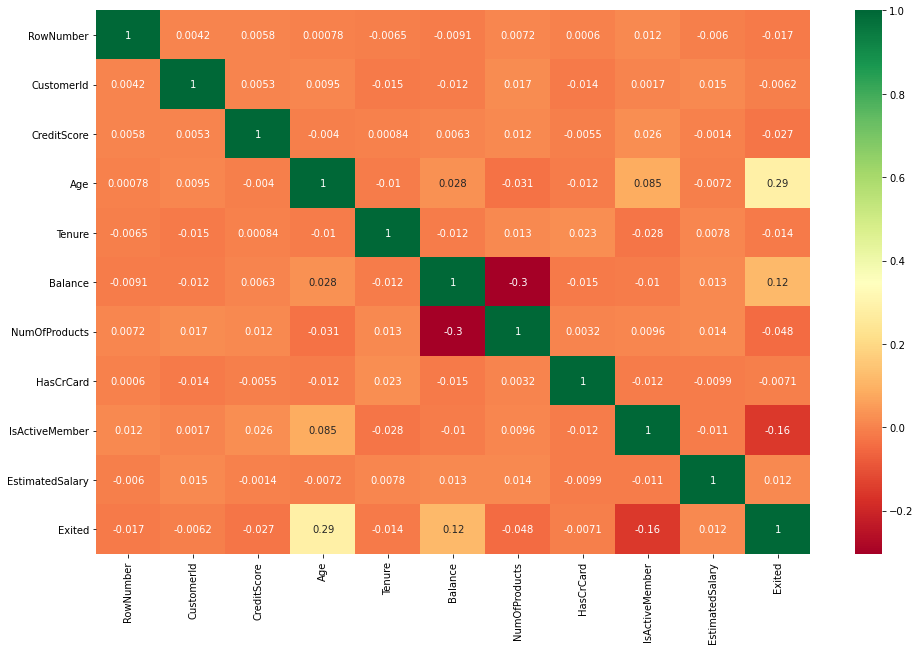

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlations of features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

# Plotting the correlation using heatmap
plt.figure(figsize=(16, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

## Extracting Independent and Dependent features

In [27]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [28]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Handling Categorical features

In [30]:
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [31]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [32]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [33]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [34]:
# Drop Categorical features

X = X.drop(['Geography', 'Gender'], axis=1)

In [35]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [36]:
# Concatenating the geography and gender dummy features

X = pd.concat([X, geography, gender], axis=1)

In [37]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Hyperparameter Optimization using RandomizedSearchCV

In [43]:
params = {
    'learning_rate': [0.05, .10, .15, .2, .25, .3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [3, 5, 7, 9],
    'gamma': [.2, .3, .4, .5, .6],
    'colsample_bytree': [.3, .4, .5, .7]
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [44]:
 def timer(start_time = None):
        if not start_time:
            start_time = datetime.now()
            return start_time
        elif start_time:
            thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
            tmin, tsec = divmod(temp_sec, 60)
            print('\n Timetaken:%i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [45]:
classifier = xgboost.XGBClassifier()

### Finding the best parameters using RandomizedSearchCV

In [46]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,
                                   n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [47]:
from datetime import datetime

# Timing starts from this point for 'start_time' variable
start_time = timer(None)
random_search.fit(X, y)
timer(start_time) 
# Timing ends here for 'start_time' variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    7.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.2s finished
C:\Users\podug\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Timetaken:0 hours 0 minutes and 8.79 seconds.


In [49]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [52]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Accuracy score with the Optimized classifier

In [53]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X, y, cv=10)

C:\Users\podug\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [54]:
score

array([0.872, 0.86 , 0.871, 0.864, 0.871, 0.857, 0.866, 0.876, 0.862,
       0.861])

In [55]:
score.mean()

0.866